# Дипломная работа

Проектная работа по модулю “Математика и статистика в Python”

1.Загрузить файл hr.csv.

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

4.Визуализировать несколько взаимосвязей между переменными.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6.Рассчитать сколько работников работает в каждом департаменте.

7.Показать распределение сотрудников по зарплатам.

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

9.Сколько сотрудников покинули компанию.

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете


In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

1. Загрузить файл hr.csv.

In [54]:
df=pd.read_csv('HR\hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [100]:
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).


In [55]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [112]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [68]:
'для начала преобразуем string данные в dummy variables'

df1 = pd.get_dummies(df, columns = ["sales","salary"],
                             prefix=["dept","salary"])
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [88]:
headers = list(df1.columns.values)

In [170]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df1)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0


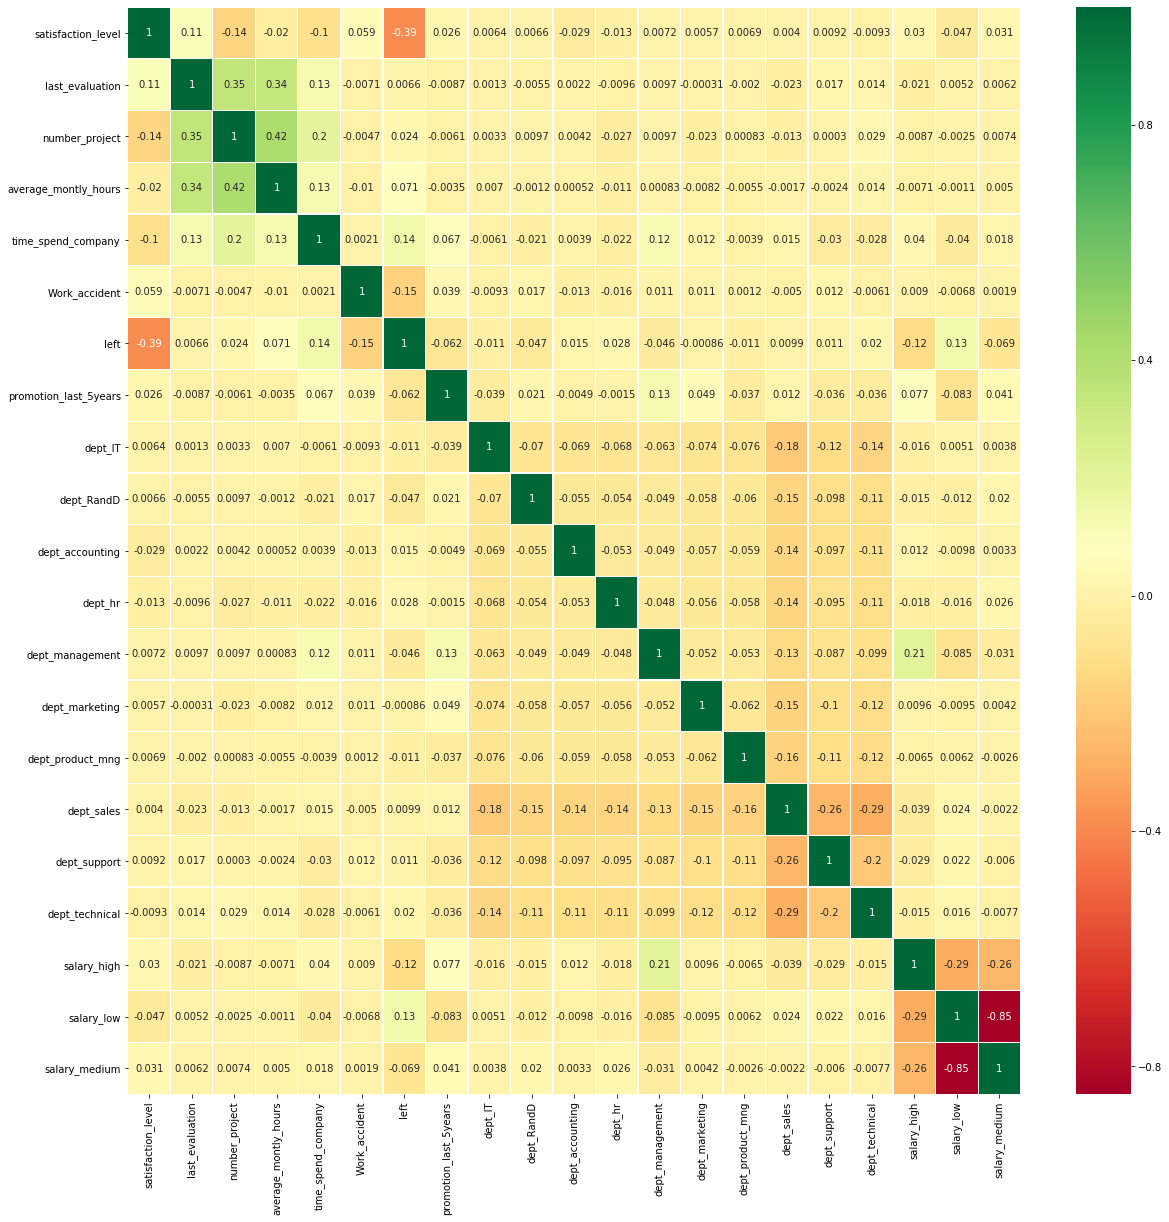

In [93]:
sns.heatmap(df_norm.corr(),annot=True,cmap='RdYlGn',linewidths=0.2, xticklabels=True, yticklabels=True) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

4. Визуализировать несколько взаимосвязей между переменными.

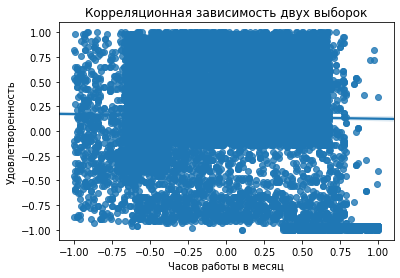

In [94]:
hours = df_norm['average_montly_hours']
satisfaction = df_norm['satisfaction_level']
sns.regplot(x= hours, y=satisfaction, data=df_norm, fit_reg=True)
plt.xlabel('Часов работы в месяц')
plt.ylabel('Удовлетворенность')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

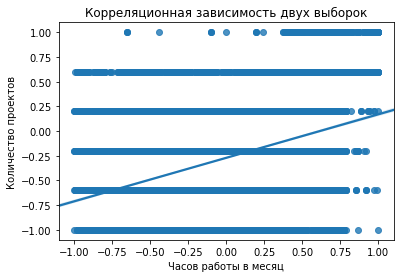

In [95]:
hours = df_norm['average_montly_hours']
projects = df_norm['number_project']
sns.regplot(x= hours, y=projects, data=df_norm, fit_reg=True)
plt.xlabel('Часов работы в месяц')
plt.ylabel('Количество проектов')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

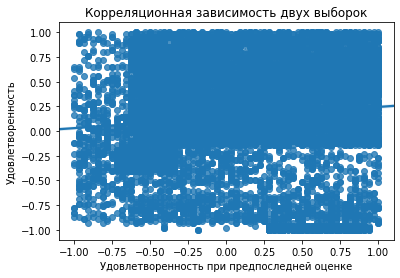

In [97]:
sat_prev = df_norm['last_evaluation']
satisfaction = df_norm['satisfaction_level']
sns.regplot(x= sat_prev, y=satisfaction, data=df_norm, fit_reg=True)
plt.xlabel('Удовлетворенность при предпоследней оценке')
plt.ylabel('Удовлетворенность')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

a. Проверим, отличается ли удовлетворенность сотрудников с высоким уровнем ЗП от генеральной совокупности.

H0: средний уровень удовлетворенности сотрудников с высокой зарплатой равен среднему уровню удовлетворенности в целом по генеральной совокупности

Н1: средний уровень удовлетворенности сотрудников с высокой зарплатой отличается от среднего уровня удовлетворенности в целом по генеральной совокупности



In [98]:
sal_high = df_norm[df_norm['salary_high']==1]['satisfaction_level']
stats.ttest_1samp(sal_high, df_norm['satisfaction_level'].mean())

Ttest_1sampResult(statistic=3.8205997501862337, pvalue=0.00013974368695862885)

p-value меньше статистичски значимого уровня 0.05, а значит гипотеза о том, что высокая зарплата не влияет на уровень удовлетвроенности не верна

b. Сравним различается ли количество часов работы у сотрудников менеждмента и продаж

H0: среднее значение monthly_hours_avg одинаково для сотрудников management и sales
    
H1: среднее значение monthly_hours_avg различается для сотрудников management и sales

In [115]:
mgmt_hours = df_norm[df_norm['dept_management']==1]['average_montly_hours']

sales_hours = df_norm[df_norm['dept_sales']==1]['average_montly_hours']

stats.ttest_ind(mgmt_hours, sales_hours)

Ttest_indResult(statistic=0.16031777143129422, pvalue=0.8726375516747552)

Вывод: среднее количество часов работы не отличается в подразделениях management и sales

6. Рассчитать сколько работников работает в каждом департаменте.

In [118]:
df.groupby('sales').count()['left']

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: left, dtype: int64

7. Показать распределение сотрудников по зарплатам.

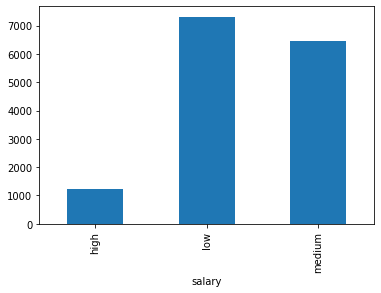

In [120]:
df.groupby('salary')['left'].count().plot(kind = 'bar')

8. Показать распределение сотрудников по зарплатам совместно с департаментами.

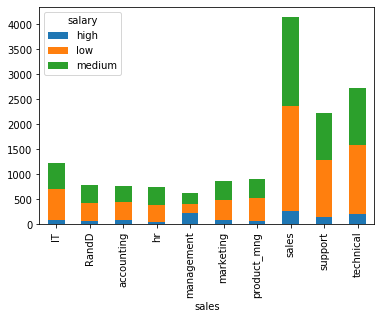

In [150]:
table = pd.pivot_table(df, values='left', index=['sales'], columns=['salary'], aggfunc='count')
table.plot(kind = 'bar', stacked = True)

9. Сколько сотрудников покинули компанию.

In [152]:
df.groupby('left').count()['salary']

left
0    11428
1     3571
Name: salary, dtype: int64

3571 сотрудник покинул компанию.

*******************

10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Проверим, является ли переработка причиной ухода. 

H0: среднее значение по увольнениям для работников работавших более 245 часов (75 процентиль) не отличается от среднего значения увольнений по генеральной совокупности
    
H1: среднее значение по увольнениям для работников работавших более 245 часов (75 процентиль) отличается от среднего по компании

In [182]:
high_workload = df[df['average_montly_hours'] >= 245]['left']
stats.ttest_1samp(high_workload, df['left'].mean())

Ttest_1sampResult(statistic=17.26058144284669, pvalue=2.443496189603138e-64)

Вывод: количество рабочих часов влияет на процент увольнений, т.к. p-value существенно меньше 0.05

Проверим, является ли низкая зарплата причиной ухода.

H0: среднее значение по увольнениям для работников с низкой зарплатой не отличается от среднего по генеральной совокупности

H1: среднее значение по увольнениям для работников с низкой зарплатой отличается от среднего по генеральной совокупности

In [171]:
low_sal = df_norm[df_norm['salary_low'] == 1]['left']
stats.ttest_1samp(low_sal, df_norm['left'].mean())

Ttest_1sampResult(statistic=11.007411787730103, pvalue=5.828800133014715e-28)

Вывод: низкая зарплата влияет на процент увольнений, т.к. p-value существенно меньше 0.05